# Data 형태 파악 및 Feature별 검토

## Data 형태 파악

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [208]:
plt.rcParams["font.family"]="Malgun Gothic"  # 한글 출력 관련 설정

In [209]:
# seaborn 관련 셋팅
sns.set_style("darkgrid")
sns.set_palette("bright")

In [210]:
df = pd.read_csv("./data/실전db.csv")
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


> => 날짜 정보의 datatype이 object로 되어 있으므로, datetime으로 변환해주고자 함

### 날짜 정보 datatype 변환 후 데이터프레임 저장 => "df_v1"

In [212]:
df_v1 = df.copy()
df_v1["JOIN_DATE"] = pd.to_datetime(df_v1["JOIN_DATE"])
df_v1["DATE"] = pd.to_datetime(df_v1["DATE"])
df_v1.info()  # 변환 후 datatype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  int64         
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 53.7+ MB


## Feature별 검토

### 1) USER_ID

In [213]:
# 고유한 유저ID 개수 파악 => 165,425개 ID 확인
len(df_v1["USER_ID"].unique())

165425

In [214]:
df_v1["USER_ID"].unique()[:50]  # 앞쪽 50개 현황 확인

array([  2858,   5647,  33314,  37001,  37819,  45633,  61985,  66488,
        71927,  73825,  74429,  80936,  83850,  84907,  88589, 107953,
       118732, 125584, 137264, 137602, 138118, 139833, 151196, 156442,
       165827, 175466, 176463, 195008, 199009, 256852, 269477, 275578,
       276164, 279001, 279687, 285903, 293079, 293127, 302513, 303039,
       306181, 309788, 315468, 316603, 316715, 320272, 324808, 343607,
       346927, 348613], dtype=int64)

In [215]:
df_v1["USER_ID"].unique()[-50:]  # 뒤쪽 50개 현황 확인

array([1829906, 1829909, 1829914, 1829917, 1829934, 1829935, 1829940,
       1829950, 1829956, 1829959, 1829962, 1829980, 1829984, 1830011,
       1830017, 1830033, 1830105, 1830109, 1830116, 1830122, 1830129,
       1830151, 1830174, 1830229, 1830238, 1830258, 1830269, 1830280,
       1830291, 1830303, 1830312, 1830317, 1830364, 1830365, 1830367,
       1830380, 1830390, 1830405, 1830442, 1830449, 1830468, 1830477,
       1830491, 1830534, 1830544, 1830551, 1830570, 1830580, 1830589,
       1830598], dtype=int64)

### 2) JOIN_DATE(가입일)

#### 연도 기준 확인

In [216]:
# 가입일 연도 기준, 기간 확인
np.sort(df_v1["JOIN_DATE"].dt.year.unique())

array([1970, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

> => 2013년 ~ 2020년의 기간이 확인되는 가운데, 동떨어져 보이는 1970년 data가 존재함 확인

In [217]:
# 1970년 data 내역 확인 => 총 1093건 존재함
df_v1.query("JOIN_DATE <= '1970-12-31'")

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


In [218]:
# 1970년에 해당하는 1093건의 날짜 data 고유한 값 리스트 확인 => 모든 data가 "1970년 1월 1일"로 입력되어 있는 것을 확인
df_v1.query("JOIN_DATE <= '1970-12-31'")["JOIN_DATE"].unique()

array(['1970-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

> => 아마도, 유저의 가입일 정보가 없는 data에 대해 일괄적으로 "1970-01-01"이 입력된 것으로 추정됨

In [219]:
# 해당되는 USER_ID 개수 확인 => 총 264개 확인
len(df_v1.query("JOIN_DATE <= '1970-12-31'")["USER_ID"].unique())

264

In [220]:
# 점검을 위해 모든 USER_ID에 대해 JOIN_DATE가 각각 1개씩만 존재하는지 확인함 => 모두 1개씩만 존재함 확인 완료

total = 0
count = 0
for k, v in df_v1.groupby("USER_ID")["JOIN_DATE"]:
    total += 1
    if len(set(v.values)) != 1:
        print(k, len(set(v.values)))
        count += 1

print(f"총 {total}개의 'USER_ID' 중, 'JOIN_DATE'값이 1개가 아닌 'USER_ID' 개수 => {count}개")

총 165425개의 'USER_ID' 중, 'JOIN_DATE'값이 1개가 아닌 'USER_ID' 개수 => 0개


#### 월 기준 확인

In [221]:
# 가입일 연도별 존재하는 월 정보 확인
for year_v in np.sort(df_v1["JOIN_DATE"].dt.year.unique()):
    temp_df = df_v1[df_v1["JOIN_DATE"].dt.year == year_v]
    month_list = np.sort(temp_df["JOIN_DATE"].dt.month.unique())
    print(year_v, month_list)

1970 [1]
2013 [12]
2014 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2015 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2016 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2017 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2018 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2019 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2020 [ 1  2  3  4  5  6  7  8  9 10 11 12]


> => 1970년을 제외하면, 2013년 12월을 시작으로 2020년 12월까지 매월 data가 존재하는 것을 확인함

> => 참조로 모두의주차장 서비스 관련 정보 검색 결과, 해당 서비스 론칭시점이 2013년 12월인 것을 확인함

#### 가입연도별 분포 시각화

In [222]:
# 가입일 연도 Column 별도 생성 => "df_v1_1"
df_v1_1 = df_v1.copy()
df_v1_1["JOIN_YEAR"] = df_v1_1["JOIN_DATE"].dt.year
df_v1_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020


<AxesSubplot:xlabel='JOIN_YEAR', ylabel='count'>

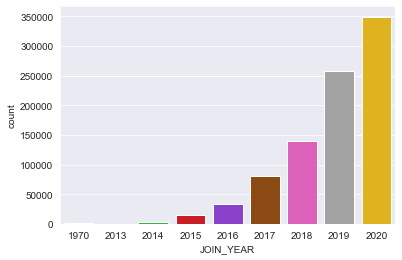

In [223]:
# 가입연도 기준 이용건수 분포 시각화
sns.countplot(data=df_v1_1, x="JOIN_YEAR")

> => 최근에 가입한 이용자일수록 2020년 연간 이용건수도 많음을 확인함

[264, 9, 549, 2679, 5796, 13500, 22936, 42124, 77568] => 총 165425명


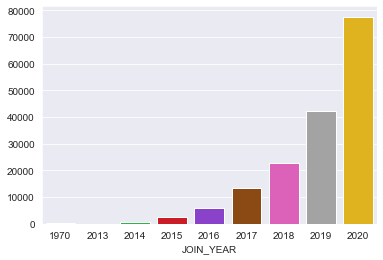

In [224]:
# 참조로, 연도별 신규 가입한 이용자수 현황도 추가 확인
join_count = df_v1_1.groupby("JOIN_YEAR")["USER_ID"].unique()
x = join_count.index
y = []

for v in join_count:
    y.append(len(v))

sns.barplot(x=x, y=y)
print(y, f"=> 총 {np.sum(y)}명")

> => 연도별로 신규 가입한 이용자수 또한 지속적으로 상승하는 추세인 것을 확인함(2020년 신규 가입자수 : 77,568명)

### 3) D_TYPE

In [225]:
# 고유한 값 확인 => 3가지 타입 존재함 확인
df_v1_1["D_TYPE"].unique()

array(['AA', 'BB', 'CC'], dtype=object)

<AxesSubplot:xlabel='D_TYPE', ylabel='count'>

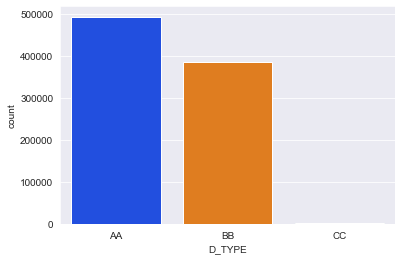

In [226]:
sns.countplot(data=df_v1_1, x="D_TYPE")

In [227]:
df_v1_1["D_TYPE"].value_counts()

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64

> => "AA"와 "BB" 건이 대부분이며, "CC" 건은 전체 대비 매우 적은 규모인 것을 확인함

In [228]:
# "USER_ID"별로 "D_TYPE"의 개수 체크해보기 => 두 Feature간 1대1로 매핑되어 있음을 확인
count_dtype = 0
for v in df_v1_1.groupby("USER_ID"):
    id_v, info_v = v
    v1 = info_v["D_TYPE"]
    if len(v1.unique()) != 1:
        print(f"{id_v} => {v1.unique()}")
        count_dtype += 1

print(f"'D_TYPE'이 1개가 아닌 'USER_ID'의 개수 => 총 {count_dtype}개 확인 완료!")

'D_TYPE'이 1개가 아닌 'USER_ID'의 개수 => 총 0개 확인 완료!


> => "AA", "BB", "CC"가 어떤 의미인지는 명확하지 않으나, 특정 기준으로 USER들을 분류해놓은 USER그룹이라는 점 판단 가능

### 4) STORE_ID

In [229]:
# 고유한 STORE_ID 개수 확인 => 총 1061개 존재함 확인
len(df_v1_1["STORE_ID"].unique())

1061

### 5) GOODS_TYPE

In [230]:
# GOODS_TYPE 내역 확인 => A, B, C, D 총 4개의 타입이 존재함 확인
np.sort(df_v1_1["GOODS_TYPE"].unique())

array(['A', 'B', 'C', 'D'], dtype=object)

<AxesSubplot:xlabel='GOODS_TYPE', ylabel='count'>

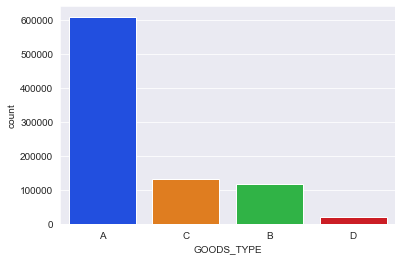

In [231]:
sns.countplot(data=df_v1_1, x="GOODS_TYPE")

In [232]:
df_v1_1["GOODS_TYPE"].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64

> => A가 가장 큰 비중을 차지하며, C와 B는 상대적으로 비슷한 수준이고 D가 가장 적은 비중을 차지함 확인

### 6) DATE(결제일)

In [233]:
# 날짜 최소값 확인
df_v1_1["DATE"].min()

Timestamp('2020-01-01 00:00:00')

In [234]:
# 날짜 최대값 확인
df_v1_1["DATE"].max()

Timestamp('2020-12-31 00:00:00')

> => 2020년 1월 1일 ~ 2020년 12월 31일 결제된 data 내역임을 확인함

#### 결제월별 분포 시각화

In [235]:
# 결제월 정보 Column 추가한 데이터프레임 생성 => "df_v1_2"
df_v1_2 = df_v1_1.copy()
df_v1_2["DATE_YM"] = df_v1_2["DATE"].dt.strftime("%Y%m")
#df_v1_2["DATE_YM"] = df_v1_2["DATE_YM"].astype(int)
df_v1_2  # 결제월("DATE_YM") 입력된 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001
...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012


<AxesSubplot:xlabel='DATE_YM', ylabel='count'>

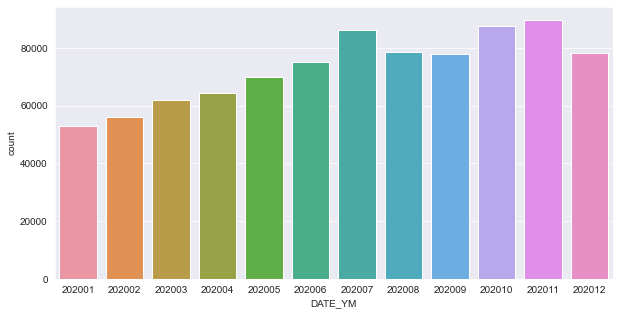

In [236]:
# 2020년 월별 결제건수 분포 추이 확인 => 대체적으로 하반기로 갈수록 증가하는 경향 확인
plt.figure(figsize=(10,5))
sns.countplot(data=df_v1_2, x="DATE_YM")

### 7) COUNT(결제건수)

In [237]:
# 결제건수 현황 확인 => 다양한 유형의 결제건수 존재함 확인
np.sort(df_v1_2["COUNT"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 55, 58, 59, 61], dtype=int64)

<AxesSubplot:xlabel='COUNT', ylabel='count'>

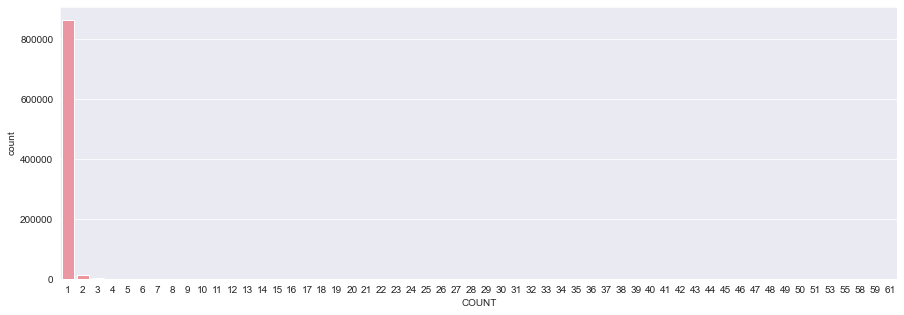

In [238]:
# 결제건수별 분포 시각화
plt.figure(figsize=(15,5))
sns.countplot(data=df_v1_2, x="COUNT")

In [239]:
df_v1_2["COUNT"].value_counts()

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
12        21
16        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
23        15
17        15
21        14
25        14
18        14
19        13
26         9
22         9
32         9
34         7
27         7
24         7
31         7
30         7
29         6
20         6
36         5
40         4
46         3
37         3
38         3
39         3
49         3
35         3
43         2
47         2
42         2
50         2
33         2
59         1
41         1
53         1
58         1
45         1
61         1
55         1
48         1
51         1
44         1
Name: COUNT, dtype: int64

> => 결제건수가 1건인 유형이 절대적으로 많긴 하지만, 다양한 유형의 결제건수가 함께 존재함을 확인함

### 8) AD1(점포 주소)

In [240]:
# 고유한 값 확인 => 다양한 주소값 유형이 존재함 확인
df_v1_2["AD1"].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

<AxesSubplot:xlabel='AD1', ylabel='count'>

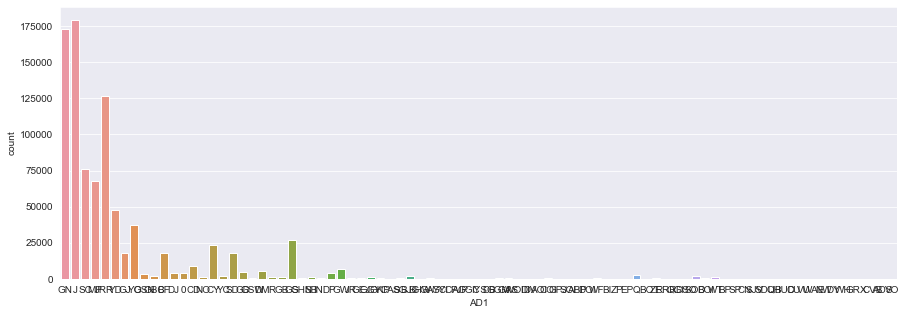

In [241]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_v1_2, x="AD1")

> => 각각의 주소값이 나타내는 의미는 명확하지 않으나, 특정 주소값(10개 내외)에 많은 data가 몰려있는 것이 확인됨 => 특정 지역 STORE에 대한 이용량이 많은 것으로 추정

In [242]:
# 점검 차원에서 "STORE_ID"별로 "AD1"의 개수 체크 => 1대1로 매핑되어 있음을 확인
count_ad1 = 0
for v in df_v1_2.groupby("STORE_ID"):
    id_v, info_v = v
    v1 = info_v["AD1"]
    if len(v1.unique()) != 1:
        print(f"{id_v} => {v1.unique()}")
        count_ad1 += 1

print(f"'AD1'이 1개가 아닌 'STORE_ID'의 개수 => 총 {count_dtype}개 확인 완료!")

'AD1'이 1개가 아닌 'STORE_ID'의 개수 => 총 0개 확인 완료!


> => 예외사항 없이, 각 "STORE_ID"별로 1개씩의 주소값을 갖고 있음 확인함

# 예측 모델에 활용할 주요 Feature 선별을 위한 분석작업

## 요일 및 날짜에 따른 이용량 변화 분석

### 전체 data 기준, 요일별 이용량 추이 분석

#### 요일 정보 Column 추가한 데이터프레임 생성 => "df_v2"

In [243]:
# "DATE(결제일)" 기준 요일 정보 추출 후 "DATE_WDAY" Column에 해당 정보 저장
df_v2 = df_v1_2.copy()
df_v2["DATE_WDAY"] = df_v2["DATE"].dt.strftime("%a")
df_v2  # 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed
...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu


<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

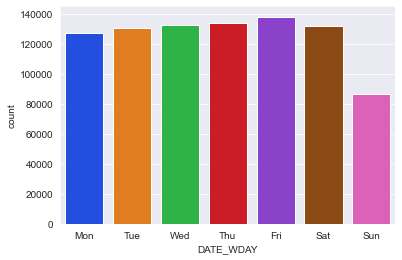

In [244]:
# 요일별 data건수 분포 시각화
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # 요일 순서 지정

> => 월요일부터 금요일까지는 점차 이용량이 증가하는 추세이며, 토요일에 소폭 감소 후 일요일에는 현저히 적은 이용량을 나타냄

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => "D_TYPE" 기준 분류

<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

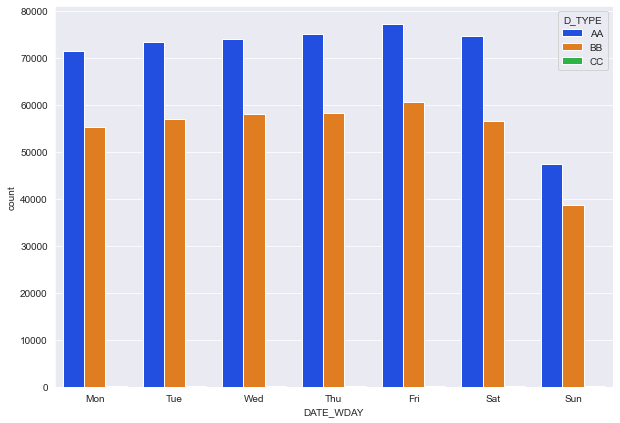

In [245]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="D_TYPE", hue_order=["AA", "BB", "CC"])

> => 대다수의 비중을 차지하고 있는 A와 B를 기준으로 비교했을 때, 두 그룹간 의미있는 차이는 관찰되지 않음

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => "GOODS_TYPE" 기준 분류

<AxesSubplot:xlabel='DATE_WDAY', ylabel='count'>

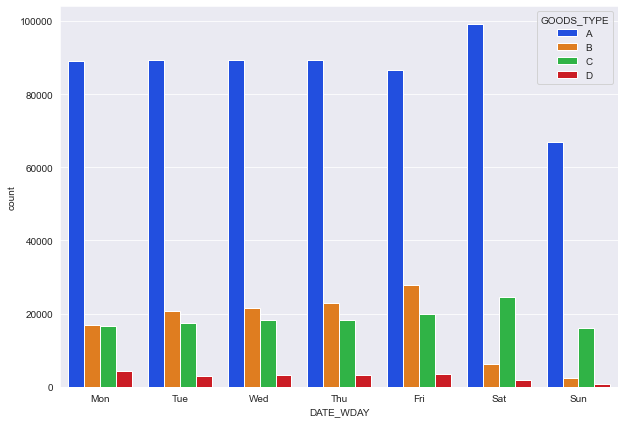

In [246]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2, x="DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="GOODS_TYPE", hue_order=["A", "B", "C", "D"])

> => 금요일과 토요일을 중심으로 A와 B TYPE간 서로 다른 이용행태가 나타남을 확인함

> => A TYPE의 경우, 금요일에는 이용량이 소폭 감소하고 토요일에 이용량이 상당히 증가하는 추세를 보임<br/> => 반면 B TYPE의 경우, 금요일까지 꾸준히 이용량이 상승한 후 토요일에 큰 폭으로 감소하는 추세를 보임

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => 이용월 기준 분류

#### "DATE_M" Column 추가한 데이터프레임 생성 => "df_v2_1"

In [247]:
df_v2_1 = df_v2.copy()
df_v2_1["DATE_M"] = df_v2["DATE"].dt.strftime("%m").astype(int)  # "DATE_M"(이용월) 정보 추가
df_v2_1["DATE_D"] = df_v2["DATE"].dt.strftime("%d").astype(int)  # "DATE_D"(이용일) 정보도 함께 추가
df_v2_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY,DATE_M,DATE_D
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed,1,1
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed,1,1
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed,1,1
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed,1,1
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu,12,31
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu,12,31
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu,12,31
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu,12,31


#### 각 월별로 요일에 따른 이용량 변화 시각화

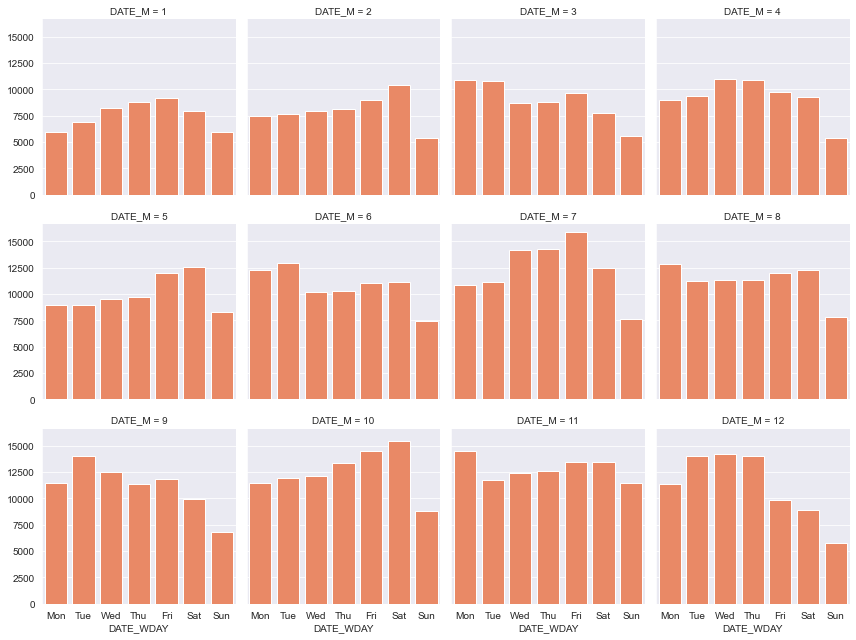

In [248]:
g = sns.FacetGrid(df_v2_1, col="DATE_M", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], color="coral")  # 코랄색 적용

> => 월별로 이용행태가 서로 다르게 나타난다는 것을 확인 가능

> => 주요 특징을 전체적으로 살펴보자면,<br/> 토요일 이용량이 유독 많은 달(2월, 5월, 10월)이 있는가 하면, 주 초반(월, 화) 이용량이 많은 달(3월, 6월, 9월)도 확인됨<br/> 또한, 금요일 이용량이 유독 많은 달(1월, 7월)이 있는 반면, 평일 중 금요일 이용량이 유독 적은 달(12월)도 존재함

### 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 => 월별/"GOODS_TYPE"별 기준 복합 적용

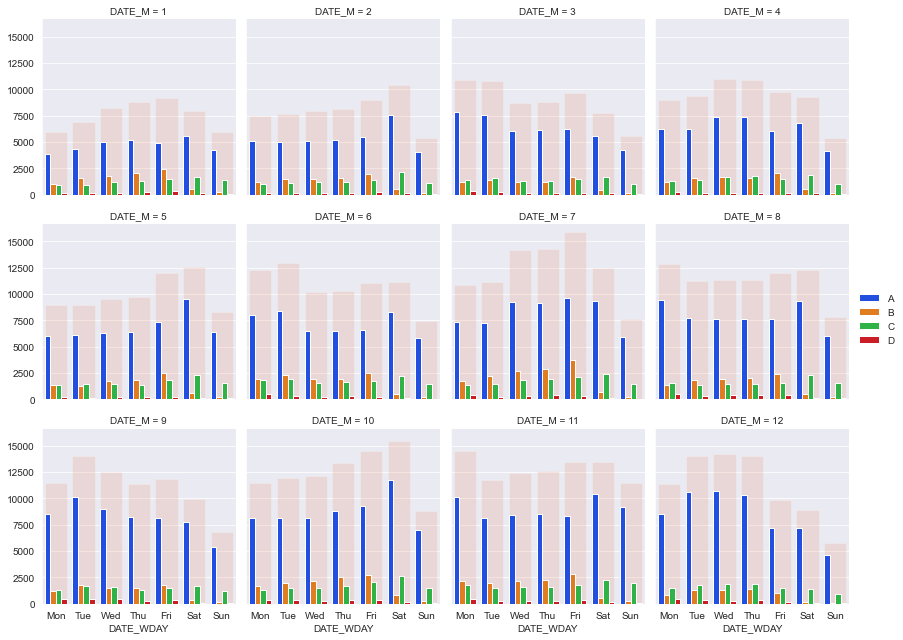

In [249]:
g = sns.FacetGrid(df_v2_1, col="DATE_M", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정

# 월별 전체 추이 그래프 겹쳐 그리기 => 참조용
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      alpha=0.2, color="coral")  # 투명도 및 색상 적용

# "GOODS_TYPE"별로 구분한 그래프 그리기
g.map(sns.countplot, "DATE_WDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      hue=df_v2_1["GOODS_TYPE"], hue_order=["A", "B", "C", "D"], palette="bright")

g.add_legend()

> => 전체적으로 비중이 가장 큰 A가 갖는 특징이 월별 특징과 비슷하게 나타나는 가운데, 1월/7월/11월의 금요일 이용량에 대해서는 A보다 B의 영향력이 상대적으로 더 큰 경향이 나타남

### 날짜(day)별 이용량 추이 분석

<AxesSubplot:xlabel='DATE_D', ylabel='count'>

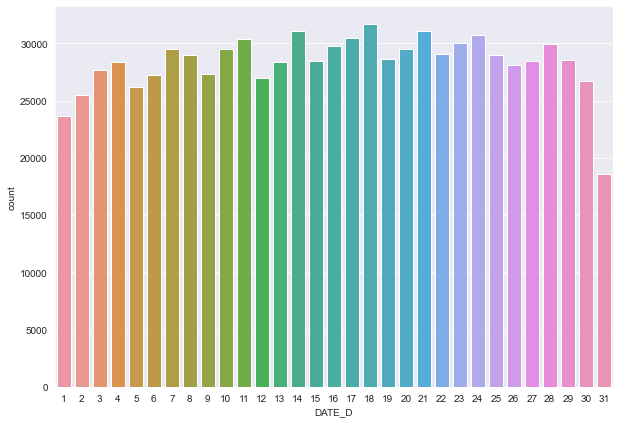

In [250]:
# 날짜(day)별 data건수 분포 시각화
plt.figure(figsize=(10,7))
sns.countplot(data=df_v2_1, x="DATE_D")

> => 3~4일 단위의 패턴이 부분적으로 관찰되며, 대체적으로 후반부로 갈수록 이용량이 소폭 증가하는 경향을 보임

> => 31일이 유독 적은 이유는 월별로 31일이 없는 달도 있기 때문인 것으로 판단됨

## 요일 및 날짜에 따른 이용량 변화 분석 결과
* 요일에 따른 이용량 변화는 물론이고, 월별, 날짜별, "GOODS_TYPE"별로도 이용량이 서로 다른 특성을 보임을 확인함
* 다만, 현재 주어진 예측모델 적용 기준상 Traing 데이터(1\~9월 기준)와 Test 데이터(10\~12월 기준)의 기준월이 상이하므로, 예측모델 적용 시 "월" Feature는 제외시키기로 함

# 예측 모델에 활용할 주요 Feature 선별 및 유저별 이용건수 예측(1차)

* 기존 Feature별 적용여부 판단(지금까지 분석한 내용 기준)
  - "JOIN_DATE" => 유저별 1개씩 존재하는 가입일 정보로 "USER_ID" 대비 추가 변별력 없음(적용 보류)
  - "D_TYPE" => 유저별 1개씩 존재하는 값으로 "USER_ID" 대비 추가 변별력 없음(적용 보류)
  - **"STORE_ID"** => 유저가 이용한 점포의 고유 id로 변별력 있음(적용)
  - **"GOODS_TYPE"** => 각 TYPE별로 이용행태가 다르게 나타나므로 변별력 있음(적용)
  - "DATE" => 날짜별로 이용행태 다르게 나타나므로 변별력 있음(적용) / 단, 연도 및 월을 제외한 이용일(**"DATE_D"**) 기준으로 적용
  - "AD1" => 점포id별로 1개씩 존재하는 주소값으로 "STORE_ID" 대비 추가 변별력 없음(적용 보류)<br/>
<br/>
* 추가 적용 Feature
  - **"DATE_WDAY"** => "DATE"에서 추출한 요일 정보로 요일별 특성 반영
  
### &nbsp;&nbsp; => "DATE_WDAY", "DATE_D", "GOODS_TYPE", "STORE_ID" 기준 예측모델 적용

<br/>

* 예측 모델 적용 관련 조건 및 가이드
  - 초기 랜덤 시드 설정 => np.random.seed(42)
  - 데이터 구성 가이드<br/>
    o Training Data => 2020.01.01 ~ 2020.09.30<br/>
    o Test Data => 2020.10.01 ~ 2020.12.31

In [251]:
np.random.seed(42)  # 랜덤 시드값 설정

In [252]:
# 예측모델 적용을 위한 현재 기준 data 별도 저장
raw_data_v1 = df_v2_1.copy()

In [253]:
# 범주형 정보 Encoding 준비 => LabelEncoder 및 OneHotEncoding 활용
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

### 요일 및 "GOODS_TYPE" 정보에 대한 LabelEncoding 적용 후 예측 수행 & 성능 측정

In [254]:
# LabelEncoding용 raw_data 별도 저장
raw_data_v1_1 = raw_data_v1.copy()

# 요일 정보 LabelEncoding
raw_data_v1_1["DATE_WDAY"] = label_encoder.fit_transform(raw_data_v1_1["DATE_WDAY"])

# GOODS_TYPE 정보 LabelEncoding
raw_data_v1_1["GOODS_TYPE"] = label_encoder.fit_transform(raw_data_v1_1["GOODS_TYPE"])

raw_data_v1_1  # 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY,DATE_M,DATE_D
0,2858,2014-01-07,AA,1892,0,2020-01-01,1,GN,2014,202001,6,1,1
1,5647,2014-02-14,BB,182009,0,2020-01-01,1,J,2014,202001,6,1,1
2,33314,2014-11-20,BB,82431,0,2020-01-01,1,SC,2014,202001,6,1,1
3,37001,2014-12-04,BB,725,2,2020-01-01,1,MP,2014,202001,6,1,1
4,37819,2014-12-07,AA,220691,2,2020-01-01,1,JRR,2014,202001,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,1,2020-12-31,1,GN,2020,202012,4,12,31
879267,1830570,2020-12-31,BB,82433,1,2020-12-31,1,CY,2020,202012,4,12,31
879268,1830580,2020-12-31,AA,92020,1,2020-12-31,1,JRR,2020,202012,4,12,31
879269,1830589,2020-12-31,BB,92437,1,2020-12-31,1,J,2020,202012,4,12,31


In [255]:
# 예측모델 적용 관련 필요한 Feature만 추출
raw_data_v1_1 = raw_data_v1_1[["USER_ID", "DATE_D", "STORE_ID",
                           "DATE_WDAY",  # 요일 관련 Column
                           "GOODS_TYPE",  # GOODS_TYPE 관련 Column
                           "COUNT",
                           "DATE"]]  # 날짜 기준으로 data 분리하기 위해 함께 추출
raw_data_v1_1

,USER_ID,DATE_D,STORE_ID,DATE_WDAY,GOODS_TYPE,COUNT,DATE
0,2858,1,1892,6,0,1,2020-01-01
1,5647,1,182009,6,0,1,2020-01-01
2,33314,1,82431,6,0,1,2020-01-01
3,37001,1,725,6,2,1,2020-01-01
4,37819,1,220691,6,2,1,2020-01-01
...,...,...,...,...,...,...,...
879266,1830551,31,219886,4,1,1,2020-12-31
879267,1830570,31,82433,4,1,1,2020-12-31
879268,1830580,31,92020,4,1,1,2020-12-31
879269,1830589,31,92437,4,1,1,2020-12-31


In [256]:
# 정해진 가이드 기준 Training, Test 데이터 분리
training_v1_1 = raw_data_v1_1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1_1 = raw_data_v1_1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

# Training, Test 데이터 준비
# USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
x_train = training_v1_1[["USER_ID", "DATE_D", "STORE_ID",
                      "DATE_WDAY",  # 요일 관련 Column
                      "GOODS_TYPE"]]  # GOODS_TYPE 관련 Column
x_test = test_v1_1[["USER_ID", "DATE_D", "STORE_ID",
                      "DATE_WDAY",  # 요일 관련 Column
                      "GOODS_TYPE"]]  # GOODS_TYPE 관련 Column
y_train = training_v1_1[["COUNT"]]
y_test = test_v1_1[["COUNT"]]

In [257]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_D,STORE_ID,DATE_WDAY,GOODS_TYPE
0,2858,1,1892,6,0
1,5647,1,182009,6,0
2,33314,1,82431,6,0
3,37001,1,725,6,2
4,37819,1,220691,6,2
...,...,...,...,...,...
623574,1709914,30,221022,6,1
623575,1709935,30,725,6,1
623576,1709942,30,223058,6,1
623577,1709950,30,182320,6,0


In [258]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_24844/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [259]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.17502383931410412
MAE : 0.09007871122039436


> => LabelEncoding 적용 후 예측 결과, MSE는 0.17373 ~ 0.17559 수준, MAE는 0.08391 ~ 0.09008 수준으로 측정됨 확인

### 요일 및 "GOODS_TYPE" 정보에 대한 OneHotEncoding 적용 후 예측 수행 & 성능 측정

In [260]:
# 요일 정보 OneHotEncoding 후, 기존 데이터프레임과 합치기
DATE_WDAY_onehot = onehot_encoder.fit_transform(raw_data_v1[["DATE_WDAY"]])  # OneHotEncoding 적용 데이터 저장
raw_data_v1 = raw_data_v1.drop("DATE_WDAY", axis=1)  # 기존 "DATE_WDAY" Column 없애기
DATE_WDAY_onehot_df = pd.DataFrame(data=DATE_WDAY_onehot.toarray(),
                                   columns=onehot_encoder.categories_[0])  # 데이터프레임 형태로 저장. categories 인덱싱 적용 주의
raw_data_v1 = pd.concat([raw_data_v1, DATE_WDAY_onehot_df], axis=1)  # 기존 데이터프레임과 합치기
raw_data_v1  # 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_M,DATE_D,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,12,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,12,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,12,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,12,31,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [261]:
# GOODS_TYPE 정보 OneHotEncoding 후, 기존 데이터프레임과 합치기
GOODS_TYPE_onehot = onehot_encoder.fit_transform(raw_data_v1[["GOODS_TYPE"]])  # OneHotEncoding 적용 데이터 저장
raw_data_v1 = raw_data_v1.drop("GOODS_TYPE", axis=1)  # 기존 "GOODS_TYPE" Column 없애기
DATE_WDAY_onehot_df = pd.DataFrame(data=GOODS_TYPE_onehot.toarray(),
                                   columns=onehot_encoder.categories_[0])  # 데이터프레임 형태로 저장. categories 인덱싱 적용 주의
raw_data_v1 = pd.concat([raw_data_v1, DATE_WDAY_onehot_df], axis=1)  # 기존 데이터프레임과 합치기
raw_data_v1  # 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_M,...,Mon,Sat,Sun,Thu,Tue,Wed,A,B,C,D
0,2858,2014-01-07,AA,1892,2020-01-01,1,GN,2014,202001,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,5647,2014-02-14,BB,182009,2020-01-01,1,J,2014,202001,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,33314,2014-11-20,BB,82431,2020-01-01,1,SC,2014,202001,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,37001,2014-12-04,BB,725,2020-01-01,1,MP,2014,202001,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37819,2014-12-07,AA,220691,2020-01-01,1,JRR,2014,202001,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,2020-12-31,1,GN,2020,202012,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
879267,1830570,2020-12-31,BB,82433,2020-12-31,1,CY,2020,202012,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
879268,1830580,2020-12-31,AA,92020,2020-12-31,1,JRR,2020,202012,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
879269,1830589,2020-12-31,BB,92437,2020-12-31,1,J,2020,202012,12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [262]:
# 예측모델 적용 관련 필요한 Feature만 추출
raw_data_v1 = raw_data_v1[["USER_ID", "DATE_D", "STORE_ID",
                           "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                           "A", "B", "C", "D",  # GOODS_TYPE 관련 Column
                           "COUNT",
                           "DATE"]]  # 날짜 기준으로 data 분리하기 위해 함께 추출
raw_data_v1

,USER_ID,DATE_D,STORE_ID,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D,COUNT,DATE
0,2858,1,1892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
1,5647,1,182009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
2,33314,1,82431,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
3,37001,1,725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
4,37819,1,220691,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,31,219886,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879267,1830570,31,82433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879268,1830580,31,92020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879269,1830589,31,92437,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31


In [263]:
# 정해진 가이드 기준 Training, Test 데이터 분리
training_v1 = raw_data_v1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1 = raw_data_v1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

# Training, Test 데이터 준비
# USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
x_train = training_v1[["USER_ID", "DATE_D", "STORE_ID",
                      "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                      "A", "B", "C", "D"]]  # GOODS_TYPE 관련 Column
x_test = test_v1[["USER_ID", "DATE_D", "STORE_ID",
                      "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                      "A", "B", "C", "D"]]  # GOODS_TYPE 관련 Column
y_train = training_v1[["COUNT"]]
y_test = test_v1[["COUNT"]]

In [264]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_D,STORE_ID,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D
0,2858,1,1892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5647,1,182009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33314,1,82431,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,37001,1,725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37819,1,220691,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,1709914,30,221022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623575,1709935,30,725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623576,1709942,30,223058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623577,1709950,30,182320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [265]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_24844/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [266]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.17032981679088707
MAE : 0.08408196789776093


> => OneHotEncoding 적용 후 예측 결과, MSE는 0.16981 ~ 0.17451 수준, MAE는 0.08408 ~ 0.09104 수준으로 측정됨 확인

#### => LabelEncoding 및 OneHotEncoding을 각각 적용해 예측한 결과, 두 결과의 성능이 비슷하거나 OneHotEncoding이 조금 더 좋은 것으로 나타남
#### => Encoding을 진행한 "요일" 및 "GOODS_TYPE"의 정보는 성격상 Ordinal보다는 Nominal에 해당하므로 위 성능테스트 결과와 함께 판단했을 때, OneHotEncoding 적용 결과를 바탕으로 이후 작업을 진행하는 것이 맞다고 판단됨

### OneHotEncoding 적용결과에 대해 Scaler 적용 후 예측 수행 & 성능 측정

#### MinMaxScaler 선언 및 적용

In [267]:
# MinMaxScaler 선언
minmax_scaler = MinMaxScaler()

# Scaler 적용 전 "DATE" 정보 별도 저장
DATE_feature = raw_data_v1[["DATE"]]
raw_data_v1 = raw_data_v1.drop("DATE", axis=1)  # "DATE" Column 없애기

# Scaler 적용 전 "COUNT" 정보 별도 저장
COUNT_feature = raw_data_v1[["COUNT"]]
raw_data_v1 = raw_data_v1.drop("COUNT", axis=1)  # "COUNT" Column 없애기

# Scaler 적용된 데이터프레임 생성
raw_data_columns = raw_data_v1.columns  # Column 정보 저장해두기
raw_data_v1 = minmax_scaler.fit_transform(raw_data_v1)  # Scaler 적용
raw_data_v1 = pd.DataFrame(data=raw_data_v1, columns=raw_data_columns)  # 데이터프레임 형태로 저장

# "DATE" 및 "COUNT" Column 다시 추가해주기
raw_data_v1 = pd.concat([raw_data_v1, COUNT_feature, DATE_feature], axis=1)

raw_data_v1

,USER_ID,DATE_D,STORE_ID,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D,COUNT,DATE
0,0.001439,0.0,0.008157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
1,0.002963,0.0,0.786331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
2,0.018078,0.0,0.356116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
3,0.020093,0.0,0.003115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
4,0.020540,0.0,0.953452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,0.999974,1.0,0.949974,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879267,0.999985,1.0,0.356125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879268,0.999990,1.0,0.397544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879269,0.999995,1.0,0.399346,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31


In [268]:
# 정해진 가이드 기준 Training, Test 데이터 분리
training_v1 = raw_data_v1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1 = raw_data_v1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

# Training, Test 데이터 준비
# USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
x_train = training_v1[["USER_ID", "DATE_D", "STORE_ID",
                      "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                      "A", "B", "C", "D"]]  # GOODS_TYPE 관련 Column
x_test = test_v1[["USER_ID", "DATE_D", "STORE_ID",
                      "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                      "A", "B", "C", "D"]]  # GOODS_TYPE 관련 Column
y_train = training_v1[["COUNT"]]
y_test = test_v1[["COUNT"]]

In [269]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_D,STORE_ID,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D
0,0.001439,0.000000,0.008157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002963,0.000000,0.786331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.018078,0.000000,0.356116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.020093,0.000000,0.003115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.020540,0.000000,0.953452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,0.934066,0.966667,0.954882,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623575,0.934077,0.966667,0.003115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623576,0.934081,0.966667,0.963679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623577,0.934086,0.966667,0.787675,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [270]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_24844/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [271]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.1694407098980254
MAE : 0.08620502604634196


> => OneHotEncoding & Scaler 적용 후 예측 결과, MSE는 0.16944 ~ 0.17540 수준, MAE는 0.08399 ~ 0.08621 수준으로 측정됨 확인

> => Scaler 적용 전 수치와 비교했을 때, 크게 의미있는 성능 향상은 확인되지 않음(비슷한 수준임)

#### [비교용] USER_ID에 대해 5배 가중치 적용 후 예측 수행 & 성능 측정
* 이용행태상 유저별 특성이 강한 점을 감안해 USER_ID 수치를 0\~1이 아닌 0\~5가 되도록 조정 후 예측 모델에 적용해 봄

In [272]:
x_train["USER_ID"] = x_train["USER_ID"] * 5
x_test["USER_ID"] = x_test["USER_ID"] * 5

x_train

c:\users\hj\.conda\envs\pydata\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,USER_ID,DATE_D,STORE_ID,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D
0,0.007195,0.000000,0.008157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.014814,0.000000,0.786331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.090391,0.000000,0.356116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.100463,0.000000,0.003115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.102698,0.000000,0.953452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,4.670330,0.966667,0.954882,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623575,4.670387,0.966667,0.003115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623576,4.670406,0.966667,0.963679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623577,4.670428,0.966667,0.787675,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [273]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_24844/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [274]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.17179815343551413
MAE : 0.08827147680964871


> => OneHotEncoding & Scaler & 가중치 적용 후 예측 결과, MSE는 0.17105 ~ 0.17499 수준, MAE는 0.08763 ~ 0.09117 수준으로 측정됨 확인

> => 가중치 적용 전 수치와 비교했을 때, 오히려 성능이 다소 저하되는 것으로 나타남

#### => 지금까지의 결과를 바탕으로, 이후에는 OneHotEncoding & Scaler 기준으로 예측 모델에 적용해 결과를 산출하고자 함

### OneHotEncoding & Scaler 적용 함수 정의

In [275]:
# OneHotEncoding 적용 함수 정의
def do_onehotencoding(raw_data):
    # OneHotEncoder 선언
    onehot_encoder = OneHotEncoder()
    
    # 요일 정보 OneHotEncoding 후, 기존 데이터프레임과 합치기
    DATE_WDAY_onehot = onehot_encoder.fit_transform(raw_data[["DATE_WDAY"]])  # OneHotEncoding 적용 데이터 저장
    raw_data = raw_data.drop("DATE_WDAY", axis=1)  # 기존 "DATE_WDAY" Column 없애기
    DATE_WDAY_onehot_df = pd.DataFrame(data=DATE_WDAY_onehot.toarray(),
                                       columns=onehot_encoder.categories_[0])  # 데이터프레임 형태로 저장. categories 인덱싱 적용 주의
    raw_data = pd.concat([raw_data, DATE_WDAY_onehot_df], axis=1)  # 기존 데이터프레임과 합치기

    # GOODS_TYPE 정보 OneHotEncoding 후, 기존 데이터프레임과 합치기
    GOODS_TYPE_onehot = onehot_encoder.fit_transform(raw_data[["GOODS_TYPE"]])  # OneHotEncoding 적용 데이터 저장
    raw_data = raw_data.drop("GOODS_TYPE", axis=1)  # 기존 "GOODS_TYPE" Column 없애기
    DATE_WDAY_onehot_df = pd.DataFrame(data=GOODS_TYPE_onehot.toarray(),
                                       columns=onehot_encoder.categories_[0])  # 데이터프레임 형태로 저장. categories 인덱싱 적용 주의
    raw_data = pd.concat([raw_data, DATE_WDAY_onehot_df], axis=1)  # 기존 데이터프레임과 합치기

    return raw_data

In [276]:
# Scaling 적용 함수 정의
def do_scaling(raw_data):
    # MinMaxScaler 선언
    minmax_scaler = MinMaxScaler()

    # Scaler 적용 전 "DATE" 정보 별도 저장
    DATE_feature = raw_data[["DATE"]]
    raw_data = raw_data.drop("DATE", axis=1)  # "DATE" Column 없애기

    # Scaler 적용 전 "COUNT" 정보 별도 저장
    COUNT_feature = raw_data[["COUNT"]]
    raw_data = raw_data.drop("COUNT", axis=1)  # "COUNT" Column 없애기

    # Scaler 적용된 데이터프레임 생성
    raw_data_columns = raw_data.columns  # Column 정보 저장해두기
    raw_data = minmax_scaler.fit_transform(raw_data)  # Scaler 적용
    raw_data = pd.DataFrame(data=raw_data, columns=raw_data_columns)  # 데이터프레임 형태로 저장

    # "DATE" 및 "COUNT" Column 다시 추가해주기
    raw_data = pd.concat([raw_data, COUNT_feature, DATE_feature], axis=1)

    return raw_data

In [277]:
# Training, Test data 준비 함수 정의
def get_train_test_data(raw_data, x_column_select, y_column_select):
    # 정해진 가이드 기준 Training, Test 데이터 분리
    train_data = raw_data.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
    test_data = raw_data.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

    # Training, Test 데이터 준비
    x_train = train_data[x_column_select]
    x_test = test_data[x_column_select]
    y_train = train_data[y_column_select]
    y_test = test_data[y_column_select]
    
    return x_train, x_test, y_train, y_test

# Feature 추가, 외부데이터 활용 및 유저별 이용건수 예측(2차)
* Feature 추가
  - 날짜("DATE") 기준, 공휴일 여부를 표시하는 "Holiday" Feature 추가<br/>
<br/>

* 외부데이터 활용
  - 교통량 데이터 활용 => 일별 교통량 정보를 표시하는 "Traffic" Feature 추가
  - 기상 데이터 활용 => 일별 기상 정보를 표시하는 "Weather" Feature 추가

## Feature 추가 => "Holiday"(공휴일 여부)
* 기적용된 요일 정보 외에 2020년 연간 공휴일 정보를 추가함으로써 추가적인 변별력 기대

In [278]:
# 2020년 공휴일 정보 저장

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

class Calendar(AbstractHolidayCalendar):
    rules = [
        Holiday("NewYear", year=2020, month=1, day=1),
        Holiday("KR_NewYear1", year=2020, month=1, day=24),
        Holiday("KR_NewYear2", year=2020, month=1, day=25),  # 설날
        Holiday("KR_NewYear3", year=2020, month=1, day=26),
        Holiday("KR_NewYear4", year=2020, month=1, day=27),  # 대체공휴일
        Holiday("3.1", year=2020, month=3, day=1),
        Holiday("Election", year=2020, month=4, day=15),  # 제21대 국회의원 선거
        Holiday("BuddhaDay", year=2020, month=4, day=30),
        Holiday("ChildrenDay", year=2020, month=5, day=5),
        Holiday("MemorialDay", year=2020, month=6, day=6),
        Holiday("NationalLiberationDay", year=2020, month=8, day=15),
        Holiday("KR_Thanksgiving1", year=2020, month=9, day=30),
        Holiday("KR_Thanksgiving2", year=2020, month=10, day=1),  # 추석
        Holiday("KR_Thanksgiving3", year=2020, month=10, day=2),
        Holiday("NationalFoundationDay", year=2020, month=10, day=3),
        Holiday("HangulDay", year=2020, month=10, day=9),
        Holiday("Christmas", year=2020, month=12, day=25)
    ]

cal = Calendar()
holidays = cal.holidays()
holidays  # 저장 결과 확인

DatetimeIndex(['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-03-01', '2020-04-15', '2020-04-30',
               '2020-05-05', '2020-06-06', '2020-08-15', '2020-09-30',
               '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09',
               '2020-12-25'],
              dtype='datetime64[ns]', freq=None)

### "Holiday" Column 추가한 신규 데이터프레임 생성 => "df_v3"

In [279]:
df_v3 = df_v2_1.copy()  # 신규 데이터프레임 생성

# "Holiday" Column 추가 및 해당 정보 저장
df_v3["Holiday"] = df_v3["DATE"].isin(holidays)
df_v3  # 저장 결과 확인

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY,DATE_M,DATE_D,Holiday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed,1,1,True
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed,1,1,True
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed,1,1,True
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed,1,1,True
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu,12,31,False
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu,12,31,False
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu,12,31,False
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu,12,31,False


### 예측 모델 적용 전, 공휴일 여부에 따른 그룹별 "COUNT"(이용건수) 규모 수치상 비교

#### "공휴일" 기준 Group과 "공휴일 외" 기준 Group간 "COUNT" 평균치 비교

In [280]:
df_v3_group1 = df_v3.query("Holiday == True")
df_v3_group2 = df_v3.query("Holiday != True")

a = df_v3_group1["COUNT"].mean()
b = df_v3_group2["COUNT"].mean()

print(f"공휴일 기준 Group =>\t {a}\n공휴일 외 기준 Group =>\t {b}")

공휴일 기준 Group =>	 1.0322964137111155
공휴일 외 기준 Group =>	 1.02898355572833


> => 기대한만큼의 큰 차이를 나타내지는 않음

#### "토, 일, 공휴일" 기준 Group과 "평일" 기준 Group간 "COUNT" 평균치 비교

In [281]:
df_v3_group1 = df_v3.query("DATE_WDAY == 'Sat' or DATE_WDAY == 'Sun' or Holiday == True")
df_v3_group2 = df_v3.query("DATE_WDAY != 'Sat' and DATE_WDAY != 'Sun' and Holiday != True")

a = df_v3_group1["COUNT"].mean()
b = df_v3_group2["COUNT"].mean()

print(f"토, 일, 공휴일 기준 Group =>\t {a}\n평일 기준 Group =>\t\t {b}")

토, 일, 공휴일 기준 Group =>	 1.0328746013740555
평일 기준 Group =>		 1.0277051556866195


> => 주말을 포함한 비교 시에도, 각 그룹간 큰 차이를 나타내지는 않는 것을 확인함

#### => 기대했던 것 만큼의 큰 변별력은 없다고 판단되나, 공휴일을 구분하는 차원에서는 의미가 있으므로 예정대로 "Holiday" Feature 적용 후 해당 예측 모델의 성능 측정을 진행해보고자 함

### "Holiday" Feature 적용 후 예측 수행 & 성능 측정

#### 기본 셋팅

In [282]:
np.random.seed(42)  # 랜덤 시드값 설정

In [283]:
# 2차 예측모델 적용을 위한 현재 기준 data 별도 저장 => "raw_data_v2"
raw_data_v2 = df_v3.copy()

#### "요일" 및 "GOODS_TYPE" OneHotEncoding

In [284]:
# OneHotEncoding 적용
raw_data_v2 = do_onehotencoding(raw_data_v2)

In [285]:
# 예측모델 적용 관련 필요한 Feature만 선택 => "Holiday" Column 함께 반영
column_select = ["USER_ID", "DATE_D", "STORE_ID",
                 "Holiday",  # "Holiday"(공휴일 여부) Column
                 "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                 "A", "B", "C", "D",  # GOODS_TYPE 관련 Column
                 "COUNT",
                 "DATE"]  # 날짜 기준으로 data 분리하기 위해 함께 추출

# 필요한 Feature 기준 추출
raw_data_v2 = raw_data_v2[column_select]

raw_data_v2  # 적용 결과 확인

,USER_ID,DATE_D,STORE_ID,Holiday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D,COUNT,DATE
0,2858,1,1892,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
1,5647,1,182009,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
2,33314,1,82431,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
3,37001,1,725,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
4,37819,1,220691,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,31,219886,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879267,1830570,31,82433,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879268,1830580,31,92020,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879269,1830589,31,92437,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31


#### Scaling 진행

In [286]:
# Scaling 적용
raw_data_v2 = do_scaling(raw_data_v2)

In [287]:
raw_data_v2  # 적용 결과 확인

,USER_ID,DATE_D,STORE_ID,Holiday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D,COUNT,DATE
0,0.001439,0.0,0.008157,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
1,0.002963,0.0,0.786331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
2,0.018078,0.0,0.356116,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
3,0.020093,0.0,0.003115,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
4,0.020540,0.0,0.953452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,0.999974,1.0,0.949974,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879267,0.999985,1.0,0.356125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879268,0.999990,1.0,0.397544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879269,0.999995,1.0,0.399346,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31


#### Training data, Test data 준비

In [288]:
# x, y Column 정보 설정
x_column_select = ["USER_ID", "DATE_D", "STORE_ID",
                   "Holiday",  # "Holiday"(공휴일 여부) Column
                   "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                   "A", "B", "C", "D"]  # GOODS_TYPE 관련 Column
y_column_select = ["COUNT"]

# Training, Test data 저장
x_train, x_test, y_train, y_test = get_train_test_data(raw_data_v2, x_column_select, y_column_select)

In [289]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_D,STORE_ID,Holiday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D
0,0.001439,0.000000,0.008157,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002963,0.000000,0.786331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.018078,0.000000,0.356116,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.020093,0.000000,0.003115,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.020540,0.000000,0.953452,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,0.934066,0.966667,0.954882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623575,0.934077,0.966667,0.003115,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623576,0.934081,0.966667,0.963679,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623577,0.934086,0.966667,0.787675,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 예측 수행 및 성능 측정

In [290]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_24844/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [291]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.17171090222850868
MAE : 0.08884378947426579


> => "Holiday" Feature 적용 후 예측 결과, MSE는 0.17101 ~ 0.17171 수준, MAE는 0.08809 ~ 0.08884 수준으로 측정됨 확인

> => "Holiday" Feature 적용 전 수치와 비교했을 때, 의미있는 성능 향상은 확인되지 않음

## 외부데이터 활용

### 1) 교통량 데이터

In [292]:
# 파일 읽어오기
traffic_df = pd.read_excel("./data/2020교통량통합.xlsx", engine="openpyxl")
traffic_df.head()

,DATE,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020-01-01,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,712.0,645.0,437.0,309.0,290.0,...,1472.0,1416.0,1483.0,1329.0,1157.0,1014.0,954.0,849.0,780.0,480.0
1,2020-01-02,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,315.0,222.0,186.0,165.0,266.0,...,1792.0,1897.0,1842.0,2061.0,1994.0,1443.0,1233.0,1165.0,1094.0,852.0
2,2020-01-03,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,457.0,295.0,236.0,279.0,...,2004.0,1929.0,2049.0,2140.0,2178.0,1654.0,1356.0,1260.0,1253.0,941.0
3,2020-01-04,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,740.0,518.0,388.0,331.0,330.0,...,1837.0,1788.0,1588.0,1669.0,1530.0,1222.0,1143.0,1089.0,1039.0,791.0
4,2020-01-05,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,424.0,297.0,230.0,209.0,...,1634.0,1673.0,1494.0,1429.0,1288.0,1035.0,987.0,884.0,803.0,564.0


> => 날짜별/지점별/방향별/시간대별 등 세부적인 정보를 담고 있는 데이터임을 확인함

> => 다만, 현 내부데이터 Feature 중 지점별/방향별/시간대별 정보와 매핑시킬 수 있는 값은 존재하지 않으므로, 일자별 정보를 중심으로 교통량에 대한 수준을 판단해 활용하고자 함

#### 일자별 교통 혼잡도 산출 => "Confusion" Column

In [293]:
# 각 행별로 0시 ~ 23시까지의 교통량 합계 구하기 => "Confusion" Column 생성
confusion = traffic_df.loc[:, "0시":].sum(axis=1)
confusion = pd.DataFrame(data=confusion, columns=["Confusion"])

# 데이터프레임에 합계열 합치기
traffic_df_v2 = pd.concat([traffic_df, confusion], axis=1)
traffic_df_v2.head()

,DATE,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,Confusion
0,2020-01-01,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,712.0,645.0,437.0,309.0,290.0,...,1416.0,1483.0,1329.0,1157.0,1014.0,954.0,849.0,780.0,480.0,21513.0
1,2020-01-02,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,315.0,222.0,186.0,165.0,266.0,...,1897.0,1842.0,2061.0,1994.0,1443.0,1233.0,1165.0,1094.0,852.0,33156.0
2,2020-01-03,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,457.0,295.0,236.0,279.0,...,1929.0,2049.0,2140.0,2178.0,1654.0,1356.0,1260.0,1253.0,941.0,35143.0
3,2020-01-04,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,740.0,518.0,388.0,331.0,330.0,...,1788.0,1588.0,1669.0,1530.0,1222.0,1143.0,1089.0,1039.0,791.0,28899.0
4,2020-01-05,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,424.0,297.0,230.0,209.0,...,1673.0,1494.0,1429.0,1288.0,1035.0,987.0,884.0,803.0,564.0,24003.0


In [294]:
# "DATA"별로 "Confusion"의 평균치 산출 후 저장 => "Confusion" Column
confusion_mean = traffic_df_v2.groupby("DATE")[["Confusion"]].mean()
confusion_mean = confusion_mean.reset_index()
confusion_mean

,DATE,Confusion
0,2020-01-01,27212.218519
1,2020-01-02,34543.459259
2,2020-01-03,37031.992593
3,2020-01-04,34067.529630
4,2020-01-05,29142.066667
...,...,...
361,2020-12-27,20764.466667
362,2020-12-28,31072.351852
363,2020-12-29,31569.322222
364,2020-12-30,31316.900000


#### 교통 혼잡도("Confusion") 정보 추가한 신규 데이터프레임 생성 => "df_v4"

In [295]:
# 신규 데이터프레임 생성 => "df_v4"
df_v4 = df_v3.copy()

In [296]:
# 위에서 산출한 교통 혼잡도("Confusion") 정보를 데이터프레임에 일자("DATE")별로 반영
df_v4 = pd.merge(df_v4, confusion_mean, how="left", left_on="DATE", right_on="DATE")
df_v4

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,JOIN_YEAR,DATE_YM,DATE_WDAY,DATE_M,DATE_D,Holiday,Confusion
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,202001,Wed,1,1,True,27212.218519
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,202001,Wed,1,1,True,27212.218519
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,202001,Wed,1,1,True,27212.218519
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,202001,Wed,1,1,True,27212.218519
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,202001,Wed,1,1,True,27212.218519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,202012,Thu,12,31,False,30831.085185
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,202012,Thu,12,31,False,30831.085185
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,202012,Thu,12,31,False,30831.085185
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,202012,Thu,12,31,False,30831.085185


### "Confusion" Feature 적용 후 예측 수행 & 성능 측정

#### 기본 셋팅

In [297]:
np.random.seed(42)  # 랜덤 시드값 설정

In [298]:
# 2-1차 예측모델 적용을 위한 현재 기준 data 별도 저장 => "raw_data_v2_1"
raw_data_v2_1 = df_v4.copy()

#### "요일" 및 "GOODS_TYPE" OneHotEncoding

In [299]:
# OneHotEncoding 적용
raw_data_v2_1 = do_onehotencoding(raw_data_v2_1)

In [300]:
# 예측모델 적용 관련 필요한 Feature만 추출 => "Confusion" Column 함께 반영
column_select = ["USER_ID", "DATE_D", "STORE_ID",
                 "Holiday",  # "Holiday"(공휴일 여부) Column
                 "Confusion",  # "Confusion"(교통 혼잡도) Column
                 "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                 "A", "B", "C", "D",  # GOODS_TYPE 관련 Column
                 "COUNT",
                 "DATE"]  # 날짜 기준으로 data 분리하기 위해 함께 추출

# 필요한 Feature 기준 추출
raw_data_v2_1 = raw_data_v2_1[column_select]

raw_data_v2_1  # 적용 결과 확인

,USER_ID,DATE_D,STORE_ID,Holiday,Confusion,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D,COUNT,DATE
0,2858,1,1892,True,27212.218519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
1,5647,1,182009,True,27212.218519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
2,33314,1,82431,True,27212.218519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
3,37001,1,725,True,27212.218519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
4,37819,1,220691,True,27212.218519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,31,219886,False,30831.085185,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879267,1830570,31,82433,False,30831.085185,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879268,1830580,31,92020,False,30831.085185,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879269,1830589,31,92437,False,30831.085185,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31


#### Scaling 진행

In [301]:
# Scaling 적용
raw_data_v2_1 = do_scaling(raw_data_v2_1)

In [302]:
raw_data_v2_1  # 적용 결과 확인

,USER_ID,DATE_D,STORE_ID,Holiday,Confusion,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D,COUNT,DATE
0,0.001439,0.0,0.008157,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
1,0.002963,0.0,0.786331,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
2,0.018078,0.0,0.356116,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2020-01-01
3,0.020093,0.0,0.003115,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
4,0.020540,0.0,0.953452,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,0.999974,1.0,0.949974,0.0,0.563915,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879267,0.999985,1.0,0.356125,0.0,0.563915,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879268,0.999990,1.0,0.397544,0.0,0.563915,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31
879269,0.999995,1.0,0.399346,0.0,0.563915,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-12-31


#### Training data, Test data 준비

In [303]:
# x, y Column 정보 설정
x_column_select = ["USER_ID", "DATE_D", "STORE_ID",
                   "Holiday",  # "Holiday"(공휴일 여부) Column
                   "Confusion",  # "Confusion"(교통 혼잡도) Column
                   "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",  # 요일 관련 Column
                   "A", "B", "C", "D"]  # GOODS_TYPE 관련 Column
y_column_select = ["COUNT"]

# Training, Test data 저장
x_train, x_test, y_train, y_test = get_train_test_data(raw_data_v2_1, x_column_select, y_column_select)

In [304]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,DATE_D,STORE_ID,Holiday,Confusion,Mon,Tue,Wed,Thu,Fri,Sat,Sun,A,B,C,D
0,0.001439,0.000000,0.008157,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002963,0.000000,0.786331,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.018078,0.000000,0.356116,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.020093,0.000000,0.003115,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.020540,0.000000,0.953452,1.0,0.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,0.934066,0.966667,0.954882,1.0,0.316042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623575,0.934077,0.966667,0.003115,1.0,0.316042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623576,0.934081,0.966667,0.963679,1.0,0.316042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
623577,0.934086,0.966667,0.787675,1.0,0.316042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 예측 수행 및 성능 측정

In [305]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

C:\Users\HJ\AppData\Local\Temp/ipykernel_24844/1814876568.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


In [306]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.1664327034087887
MAE : 0.09140810037075855


> => "Confusion" Feature 적용 후 예측 결과, MSE는 0.16490 ~ 0.16643 수준, MAE는 0.08949 ~ 0.09141 수준으로 측정됨 확인

> => "Confusion" Feature 적용 전 수치와 비교했을 때, MSE 수치상 약간의 성능 향상이 있는 것으로 나타남

### 2) 기상 데이터

In [307]:
# 서울시 기상데이터 불러오기
weather_df = pd.read_csv("./data/서울시_기상데이터.csv", encoding="cp949")  # 한글 관련 인코딩 설정
weather_df

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0
...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1


> => 지점은 "108"이라는 값 1개만 존재하며, 일자별/시간대별 기상 관련 각종 수치들이 포함된 자료인 것을 확인함

> => "일시" Column에 날짜와 시간이 함께 입력되어 있으므로, 날짜만 따로 분리한 뒤 일자별 평균치 데이터를 산출해 활용하고자 함

In [308]:
# 연월일 Column 추가 및 datetime 형태로 날짜 정보 저장
weather_df["연월일"] = pd.to_datetime(weather_df["일시"].str[:10])
weather_df

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,연월일
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2,2020-01-01
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1,2020-01-01
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1,2020-01-01
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0,2020-01-01
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2,2020-12-30
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2,2020-12-30
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1,2020-12-30
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1,2020-12-30


In [309]:
# 일자별 데이터 평균치 산출 후 데이터프레임으로 저장
weather_df_v2 = weather_df.groupby("연월일")[["기온", "강수량", "풍속", "습도", "일조시간", "적설량", "지면온도", "지중온도"]].mean()
weather_df_v2

,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
연월일,,,,,,,,
2020-01-01,-2.543478,0.025000,1.152174,62.739130,0.072727,0.0,-0.917391,2.856522
2020-01-02,0.987500,NaN,1.912500,64.875000,0.000000,NaN,-0.020833,2.625000
2020-01-03,0.120833,NaN,1.879167,57.833333,0.800000,NaN,-0.554167,2.683333
2020-01-04,1.054167,NaN,1.895833,50.875000,0.718182,NaN,-0.395833,2.695833
2020-01-05,1.175000,NaN,1.045833,45.666667,0.645455,NaN,-0.737500,2.629167
...,...,...,...,...,...,...,...,...
2020-12-27,5.395833,0.000000,1.850000,63.125000,0.536364,NaN,1.291667,1.683333
2020-12-28,6.920833,0.650000,1.441667,71.000000,0.727273,NaN,3.108333,2.070833
2020-12-29,1.033333,0.066667,2.733333,71.958333,0.000000,NaN,-0.133333,2.733333


> => 위 기상 데이터 수치들이 내부데이터의 일자별 이용건수("COUNT")와 어떤 상관관계가 있는지 파악 후 주요 Feature를 추출하고자 함

In [310]:
# 내부데이터의 일자별 이용건수 산출 및 기상 데이터와 합치기
count_df = df_v4.groupby("DATE")[["COUNT"]].mean()
weather_df_v2_1 = pd.concat([count_df, weather_df_v2], axis=1)
weather_df_v2_1

,COUNT,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
2020-01-01,1.011905,-2.543478,0.025000,1.152174,62.739130,0.072727,0.0,-0.917391,2.856522
2020-01-02,1.027064,0.987500,NaN,1.912500,64.875000,0.000000,NaN,-0.020833,2.625000
2020-01-03,1.019722,0.120833,NaN,1.879167,57.833333,0.800000,NaN,-0.554167,2.683333
2020-01-04,1.026051,1.054167,NaN,1.895833,50.875000,0.718182,NaN,-0.395833,2.695833
2020-01-05,1.021348,1.175000,NaN,1.045833,45.666667,0.645455,NaN,-0.737500,2.629167
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.043860,5.395833,0.000000,1.850000,63.125000,0.536364,NaN,1.291667,1.683333
2020-12-28,1.027553,6.920833,0.650000,1.441667,71.000000,0.727273,NaN,3.108333,2.070833
2020-12-29,1.027636,1.033333,0.066667,2.733333,71.958333,0.000000,NaN,-0.133333,2.733333
2020-12-30,1.036945,-10.366667,NaN,4.037500,54.833333,0.754545,NaN,-4.037500,2.416667


c:\users\hj\.conda\envs\pydata\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\hj\.conda\envs\pydata\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

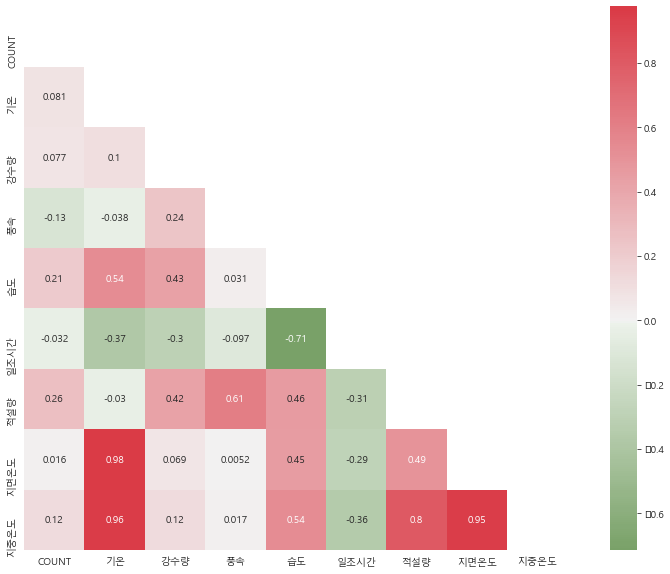

In [311]:
# Feature간 상관관계 시각화
sns.set_style("white")
corr = weather_df_v2_1.corr()
plt.figure(figsize=(15, 10))
plt.rcParams["font.family"]="Malgun Gothic"  # 한글 출력 관련 설정
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(120, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, center=0, annot=True)

> => 기대와는 달리 대부분의 기상 관련 지표들이 "COUNT"와 상관관계는 높지 않은 것으로 나타남

> => 테스트 차원에서, 다른 지표 대비 상대적으로 상관관계가 높게 나타난 4개 지표(적설량, 습도, 지중온도, 풍속)를 추가해 예측 모델에 적용해보았으나, 이전 예측 결과에 비해 오히려 성능이 저하되는 것을 확인하였음

> => 따라서, 기상 데이터 관련 지표는 예측 모델에 적용 보류하기로 함

# USER 그룹 관련 지표 추가 및 유저별 이용건수 예측(3차)